In [4]:
import os
import av
import pathlib
import numpy as np
import torch
import argparse
from torch.utils.data import DataLoader
from transformers import AutoImageProcessor, AutoTokenizer, VisionEncoderDecoderModel
# from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW
from datasets import load_dataset
from datasets import Dataset
device = "cuda" if torch.cuda.is_available() else "cpu"

/home/907308160/code/nairr/.conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# NPZ Files

In [5]:
npz_file = '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/train/FldgzyEOSH8_373115_380731.npz'
npz_data = np.load(npz_file)
npz_data.files

['arr_0', 'arr_1']

In [6]:
processed_images = torch.from_numpy(npz_data['arr_0']) 
print(type(processed_images), processed_images.shape)

<class 'torch.Tensor'> torch.Size([8, 3, 224, 224])


In [7]:
processed_captions = torch.from_numpy(npz_data['arr_1'])
print(type(processed_captions), processed_captions.shape)

<class 'torch.Tensor'> torch.Size([1, 1024])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


(8, 3, 224, 224)
(3, 224, 224)
(224, 224, 3)


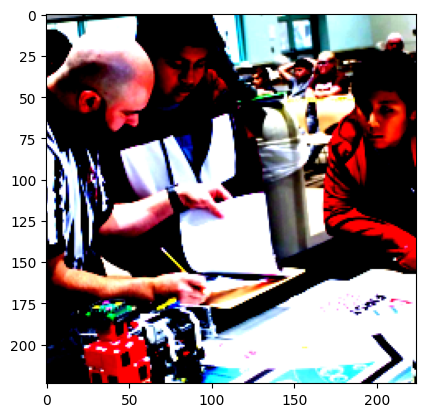

In [8]:
import matplotlib.pyplot as plt

np_images = processed_images.detach().numpy()
an_image = np_images[4]
print(np_images.shape)
print(an_image.shape)

# Transpose channels last to give to imshow
first_image_channel_last = np.transpose(an_image, (1, 2, 0))
print(first_image_channel_last.shape)
plt.imshow(first_image_channel_last)
plt.show()

# NPZ Dataloader with batching

In [10]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class NPZDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.file_names = os.listdir(data_dir)

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        file_path = os.path.join(self.data_dir, self.file_names[idx])
        data = np.load(file_path)
        # Assuming each .npz file contains 'data' and 'label'
        sample = {'filenames': self.file_names[idx], 'pixel_values': torch.from_numpy(data['arr_0']), 'labels': torch.from_numpy(data['arr_1'])}
        return sample

In [19]:
data_dir = '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/train'
dataset = NPZDataset(data_dir)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [20]:
len(dataloader)

56317

In [11]:
for batch in dataloader:
    filenames, images, captions = batch['filenames'], batch['pixel_values'], batch['labels']
    # Train your model here
    print(filenames, images.shape, captions.shape)

    import sys
    sys.exit

['jxzs4oxiwOQ_655839_666933.npz', 'Vd3zEZLPwgU_41786_45967.npz'] torch.Size([2, 8, 3, 224, 224]) torch.Size([2, 1, 1024])
['2t7-_Jp4y8k_51032_53726.npz', 'h8ds-WGtZNU_166961_169265.npz'] torch.Size([2, 8, 3, 224, 224]) torch.Size([2, 1, 1024])
['rTaCSBDN3p4_232408_245379.npz', 'rUawpuGuwbM_402_10898.npz'] torch.Size([2, 8, 3, 224, 224]) torch.Size([2, 1, 1024])
['eXl8RcZSw4Q_103838_107739.npz', 'yEvhDTWSRec_0_5461.npz'] torch.Size([2, 8, 3, 224, 224]) torch.Size([2, 1, 1024])
['VKL-Qo4VY6s_344068_347040.npz', 'tTnZ6eRvOHk_135642_152197.npz'] torch.Size([2, 8, 3, 224, 224]) torch.Size([2, 1, 1024])
['S2dcXFPi0jQ_761619_764688.npz', 'UPBMG5EYydo_193093_197458.npz'] torch.Size([2, 8, 3, 224, 224]) torch.Size([2, 1, 1024])
['wxm8jTzU_8o_168553_173476.npz', 'oKficmlxzaI_45391_49483.npz'] torch.Size([2, 8, 3, 224, 224]) torch.Size([2, 1, 1024])
['a0P2SnNOIpU_756167_766919.npz', '2pKosXv66_0_1324553_1343779.npz'] torch.Size([2, 8, 3, 224, 224]) torch.Size([2, 1, 1024])
['s4tilUQk-wE_192844_20

KeyboardInterrupt: 